<a href="https://colab.research.google.com/github/sleetysleet/aiffel/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%89%B4%EC%8A%A4_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

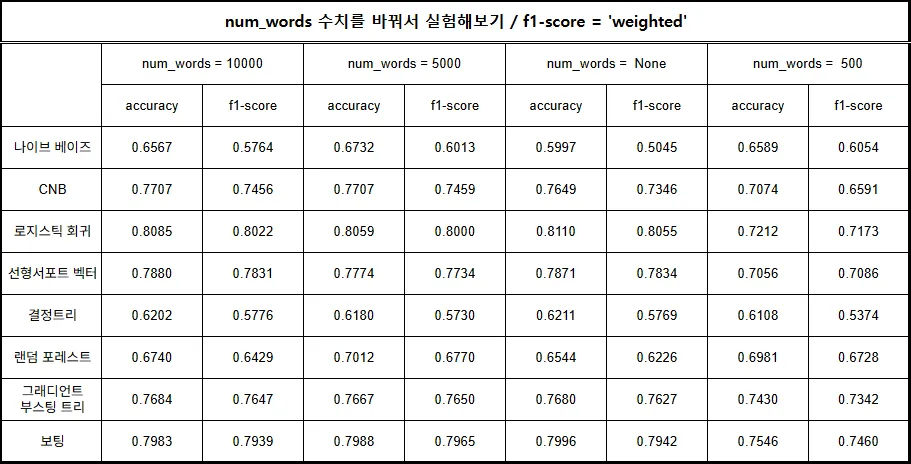

#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)


### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

| Vocabulary Size | Model             | Accuracy | F1-Score |
|------------------|------------------|----------|----------|
| 10000            | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | KNN                |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| 5000             | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | KNN                |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| NaN (All words)  | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | KNN                |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |

2. 딥러닝과 머신런닝의 차이 비교하기
- 벡터화 방법을 바꿔보며(DTM, W2V) 머신러닝 모델1개(성능 잘나온 친구) , 딥러닝 모델 2개(Dense, RNN)를 비교해보세요 평가지표 = accuacry, f1-score

### 📊 벡터화 방법별 ML/DL 모델 성능 비교 (Accuracy / F1-score)

| Vectorization | Model           | Accuracy | F1-Score |
|---------------|------------------|----------|----------|
| Word2Vec      | ML Model (ex. XGBoost) |          |          |
|               | Dense NN         |          |          |
|               | RNN              |          |          |

# 데이터셋 만들기

In [7]:
!pip install gensim

In [8]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비
## W2V 학습데이터 준비

In [9]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2) ##

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [11]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [12]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [13]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [14]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [15]:
x_train_tfidf.shape

(8982, 4867)

In [16]:
x_test_tfidf.shape

(2246, 4867)

In [17]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian <unk> senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial <unk> standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed <unk> <unk> credit using a variety of financial <unk> instead of <unk> <unk> on <unk> ability senate agriculture committee chairman <unk> <unk> d <unk> <unk> the proposed <unk> changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the <unk> purpose away from being <unk> <unk> of last <unk> toward becoming a big cit

In [18]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 512, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [19]:
# W2V이 잘되었는지 확인 -> 여차저차 되긴한것같다
model_result = model.wv.most_similar('man')
print(model_result)

[('ontario', 0.8081814050674438), ('reed', 0.7836727499961853), ('myers', 0.7782236337661743), ('row', 0.7761414647102356), ('cooperative', 0.7738037705421448), ('shelf', 0.7729055881500244), ('site', 0.7590724229812622), ('tenneco', 0.7589704990386963), ('aegean', 0.7582259774208069), ('arms', 0.757258415222168)]


In [20]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])




In [21]:
x_train_w2v.shape

(8982, 100, 512)

In [22]:
x_test_w2v.shape

(2246, 100, 512)

# 모델 정의 및 실험
머신러닝 실험은 저번 코드를 참고해주세요~

두번째 실험에 대해서만 다루겠습니다

In [23]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7961
✅ F1-score : 0.7897


In [25]:
# 데이터를 단어단위에서 문장단위로 바꿔줘야합니다.. ML은 2차원데이터만 받을수있기때문
# 문장에 대해서 토큰들의 벡터를 평균을 취해줍니다.

# Word2Vec 임베딩 시퀀스: (8982, 100, 256)
x_w2v_seq_train = x_train_w2v
x_w2v_seq_test = x_test_w2v
# 평균 풀링 → (8982, 256)
x_w2v_avg_train = np.mean(x_w2v_seq_train, axis=1)
x_w2v_avg_test = np.mean(x_w2v_seq_test, axis=1)
print(x_w2v_avg_train.shape)  # (8982, 256)

(8982, 512)


In [26]:
# Word2Vec 데이터로 XGBoost 모델 학습하기
from xgboost import XGBClassifier


# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_w2v_avg_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
# 예측
y_pred = xgb_model.predict(x_w2v_avg_test)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7284
✅ F1-score : 0.7126


# Dense NN 딥러닝 모델

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


dense_model = Sequential([
    Flatten(),  # (seq_len, embedding_dim)
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요!
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5066 - loss: 2.3278 - val_accuracy: 0.6572 - val_loss: 1.5672
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6832 - loss: 1.3699 - val_accuracy: 0.6822 - val_loss: 1.4704
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7287 - loss: 1.1403 - val_accuracy: 0.6962 - val_loss: 1.4009
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7857 - loss: 0.8430 - val_accuracy: 0.7001 - val_loss: 1.4125
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8125 - loss: 0.7640 - val_accuracy: 0.6800 - val_loss: 1.4525
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8317 - loss: 0.7178 - val_accuracy: 0.6950 - val_loss: 1.4873
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8563 - loss: 0.5872 - val_accuracy: 0.6934 - val_loss: 1.6479
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8522 - loss: 0.5822 - val_acc

In [30]:


y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
✅ Accuracy: 0.6874
✅ F1-score: 0.6676


# RNN 딥러닝 모델

In [31]:
# rnn 시계열 특징 데이터 특화 모델

rnn_model = Sequential([
    LSTM(128),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요~
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 시간이 좀 걸립니다! 한 20분정도
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4350 - loss: 2.5349 - val_accuracy: 0.5554 - val_loss: 1.7562
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5648 - loss: 1.7747 - val_accuracy: 0.6416 - val_loss: 1.5046
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6334 - loss: 1.5723 - val_accuracy: 0.6494 - val_loss: 1.4566
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6615 - loss: 1.4149 - val_accuracy: 0.6850 - val_loss: 1.3037
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6875 - loss: 1.3299 - val_accuracy: 0.7101 - val_loss: 1.2233
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7073 - loss: 1.1796 - val_accuracy: 0.7101 - val_loss: 1.2036
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7152 - loss: 1.1486 - val_accuracy: 0.7234 - val_loss: 1.1516
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7372 - loss: 1.0804 - val_acc

# 로스가 떨어지는 폭을 보아하니 좀더 돌리면 점수가 더 높게 나올것같습니다!

여기까지 실험하고 시간이 좀 남으시는 분들만 실험해보시길

In [33]:

y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
✅ Accuracy: 0.7266
✅ F1-score: 0.6921


In [34]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=46)
y_test_one_hot = to_categorical(y_test, num_classes=46)